In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df=pd.read_csv("cleaned_dataset.csv")
df.shape

(39237, 15)

# Univariate Analysis

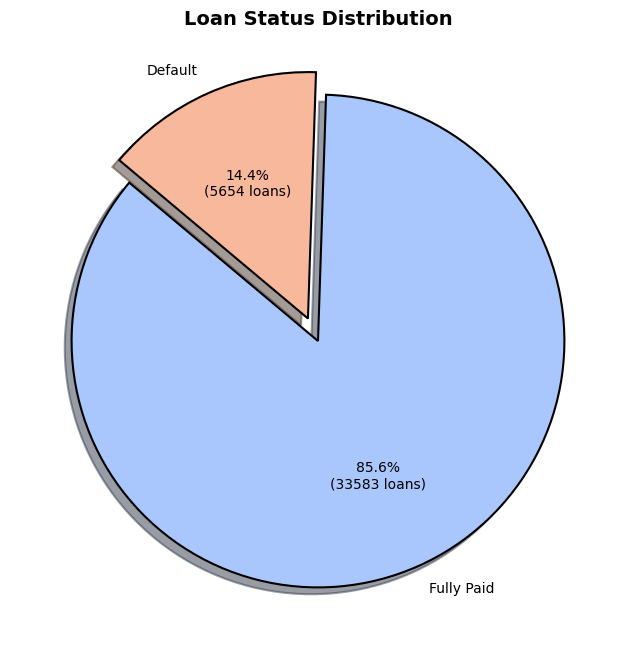

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count loan status values
loan_status_counts = df["loan_status"].value_counts()

# Define colors using Seaborn's color palette
colors = sns.color_palette("coolwarm", len(loan_status_counts))

# Define explode to highlight the 'Default' category
explode = [0.1 if status == "Default" else 0 for status in loan_status_counts.index]

# Define function for percentage and count labels
def func(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return "{:.1f}%\n({:d} loans)".format(pct, absolute)

# Create figure
plt.figure(figsize=(8, 8))
plt.pie(
    loan_status_counts, 
    labels=loan_status_counts.index, 
    autopct=lambda pct: func(pct, loan_status_counts),
    colors=colors,
    explode=explode, 
    startangle=140,  
    wedgeprops={"edgecolor": "black", "linewidth": 1.5, "antialiased": True}, 
    shadow=True
)


# Add title
plt.title("Loan Status Distribution", fontsize=14, fontweight="bold")

# Show plot
plt.show()


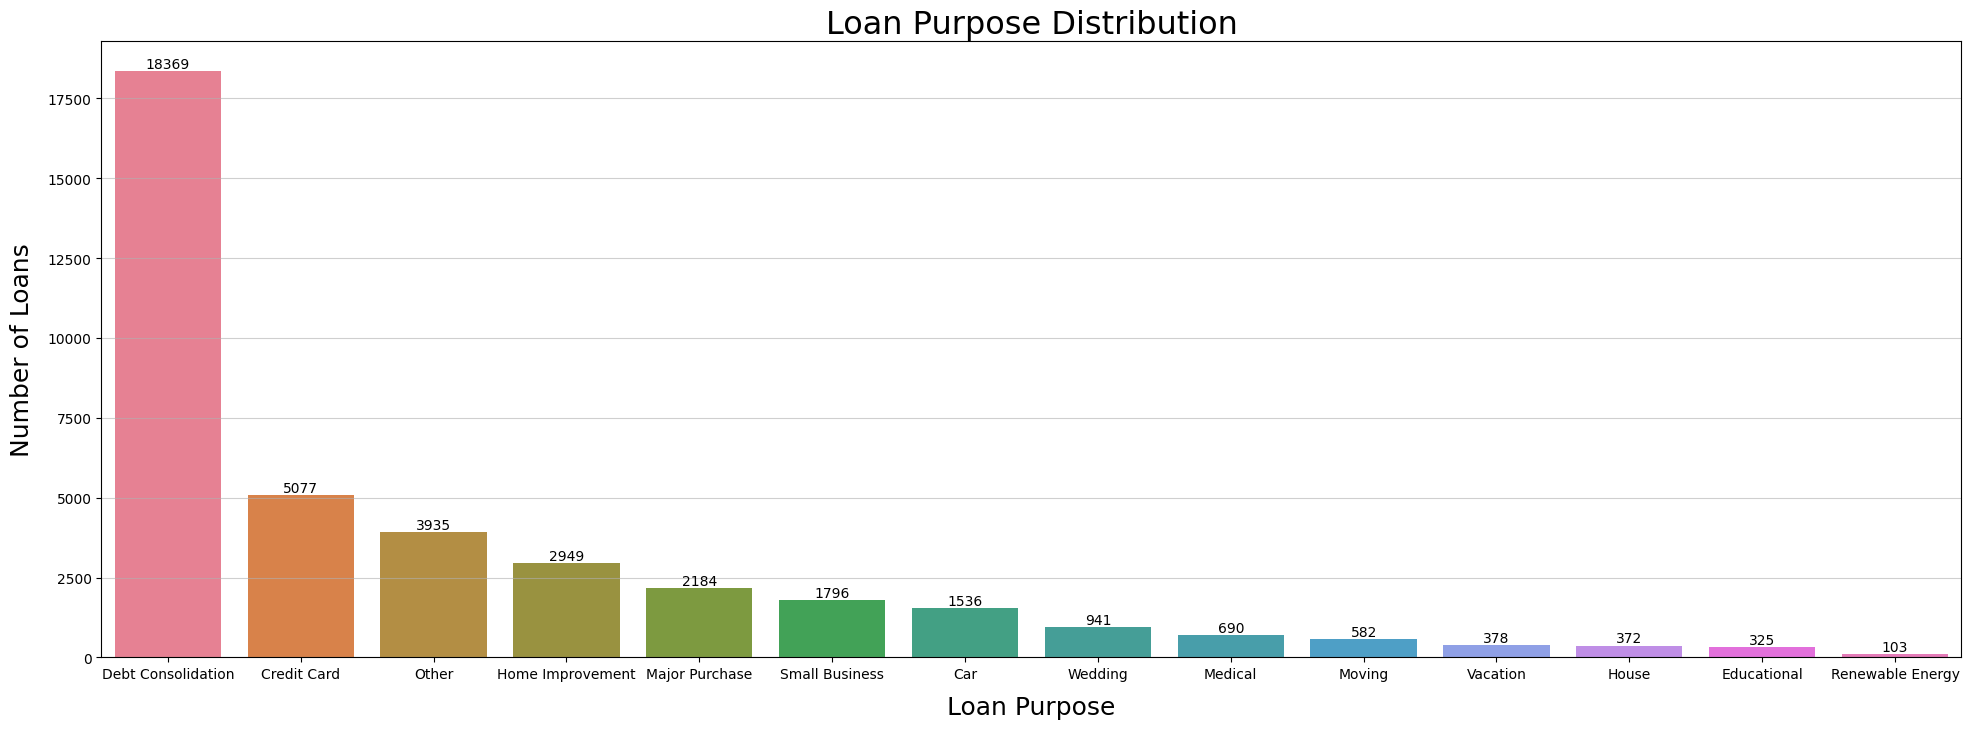

In [4]:
# 2. Majority Loan Purpose
loan_purpose_counts = df["purpose"].value_counts()

plt.figure(figsize=(24,8))
plt.title("Loan Purpose Distribution",fontsize="23")
ax=sns.barplot(x=loan_purpose_counts.index,y=loan_purpose_counts.values,hue=loan_purpose_counts.index)
bars=ax.patches
heights=[bar.get_height() for bar in bars]
plt.xlabel("Loan Purpose", fontsize=18, labelpad=10)
plt.ylabel("Number of Loans", fontsize=18, labelpad=10)
plt.grid(axis="y", linestyle="-", alpha=0.6)
#adding annoation on the top of te bar chart
for bar,height in zip(bars,heights):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )
plt.show()

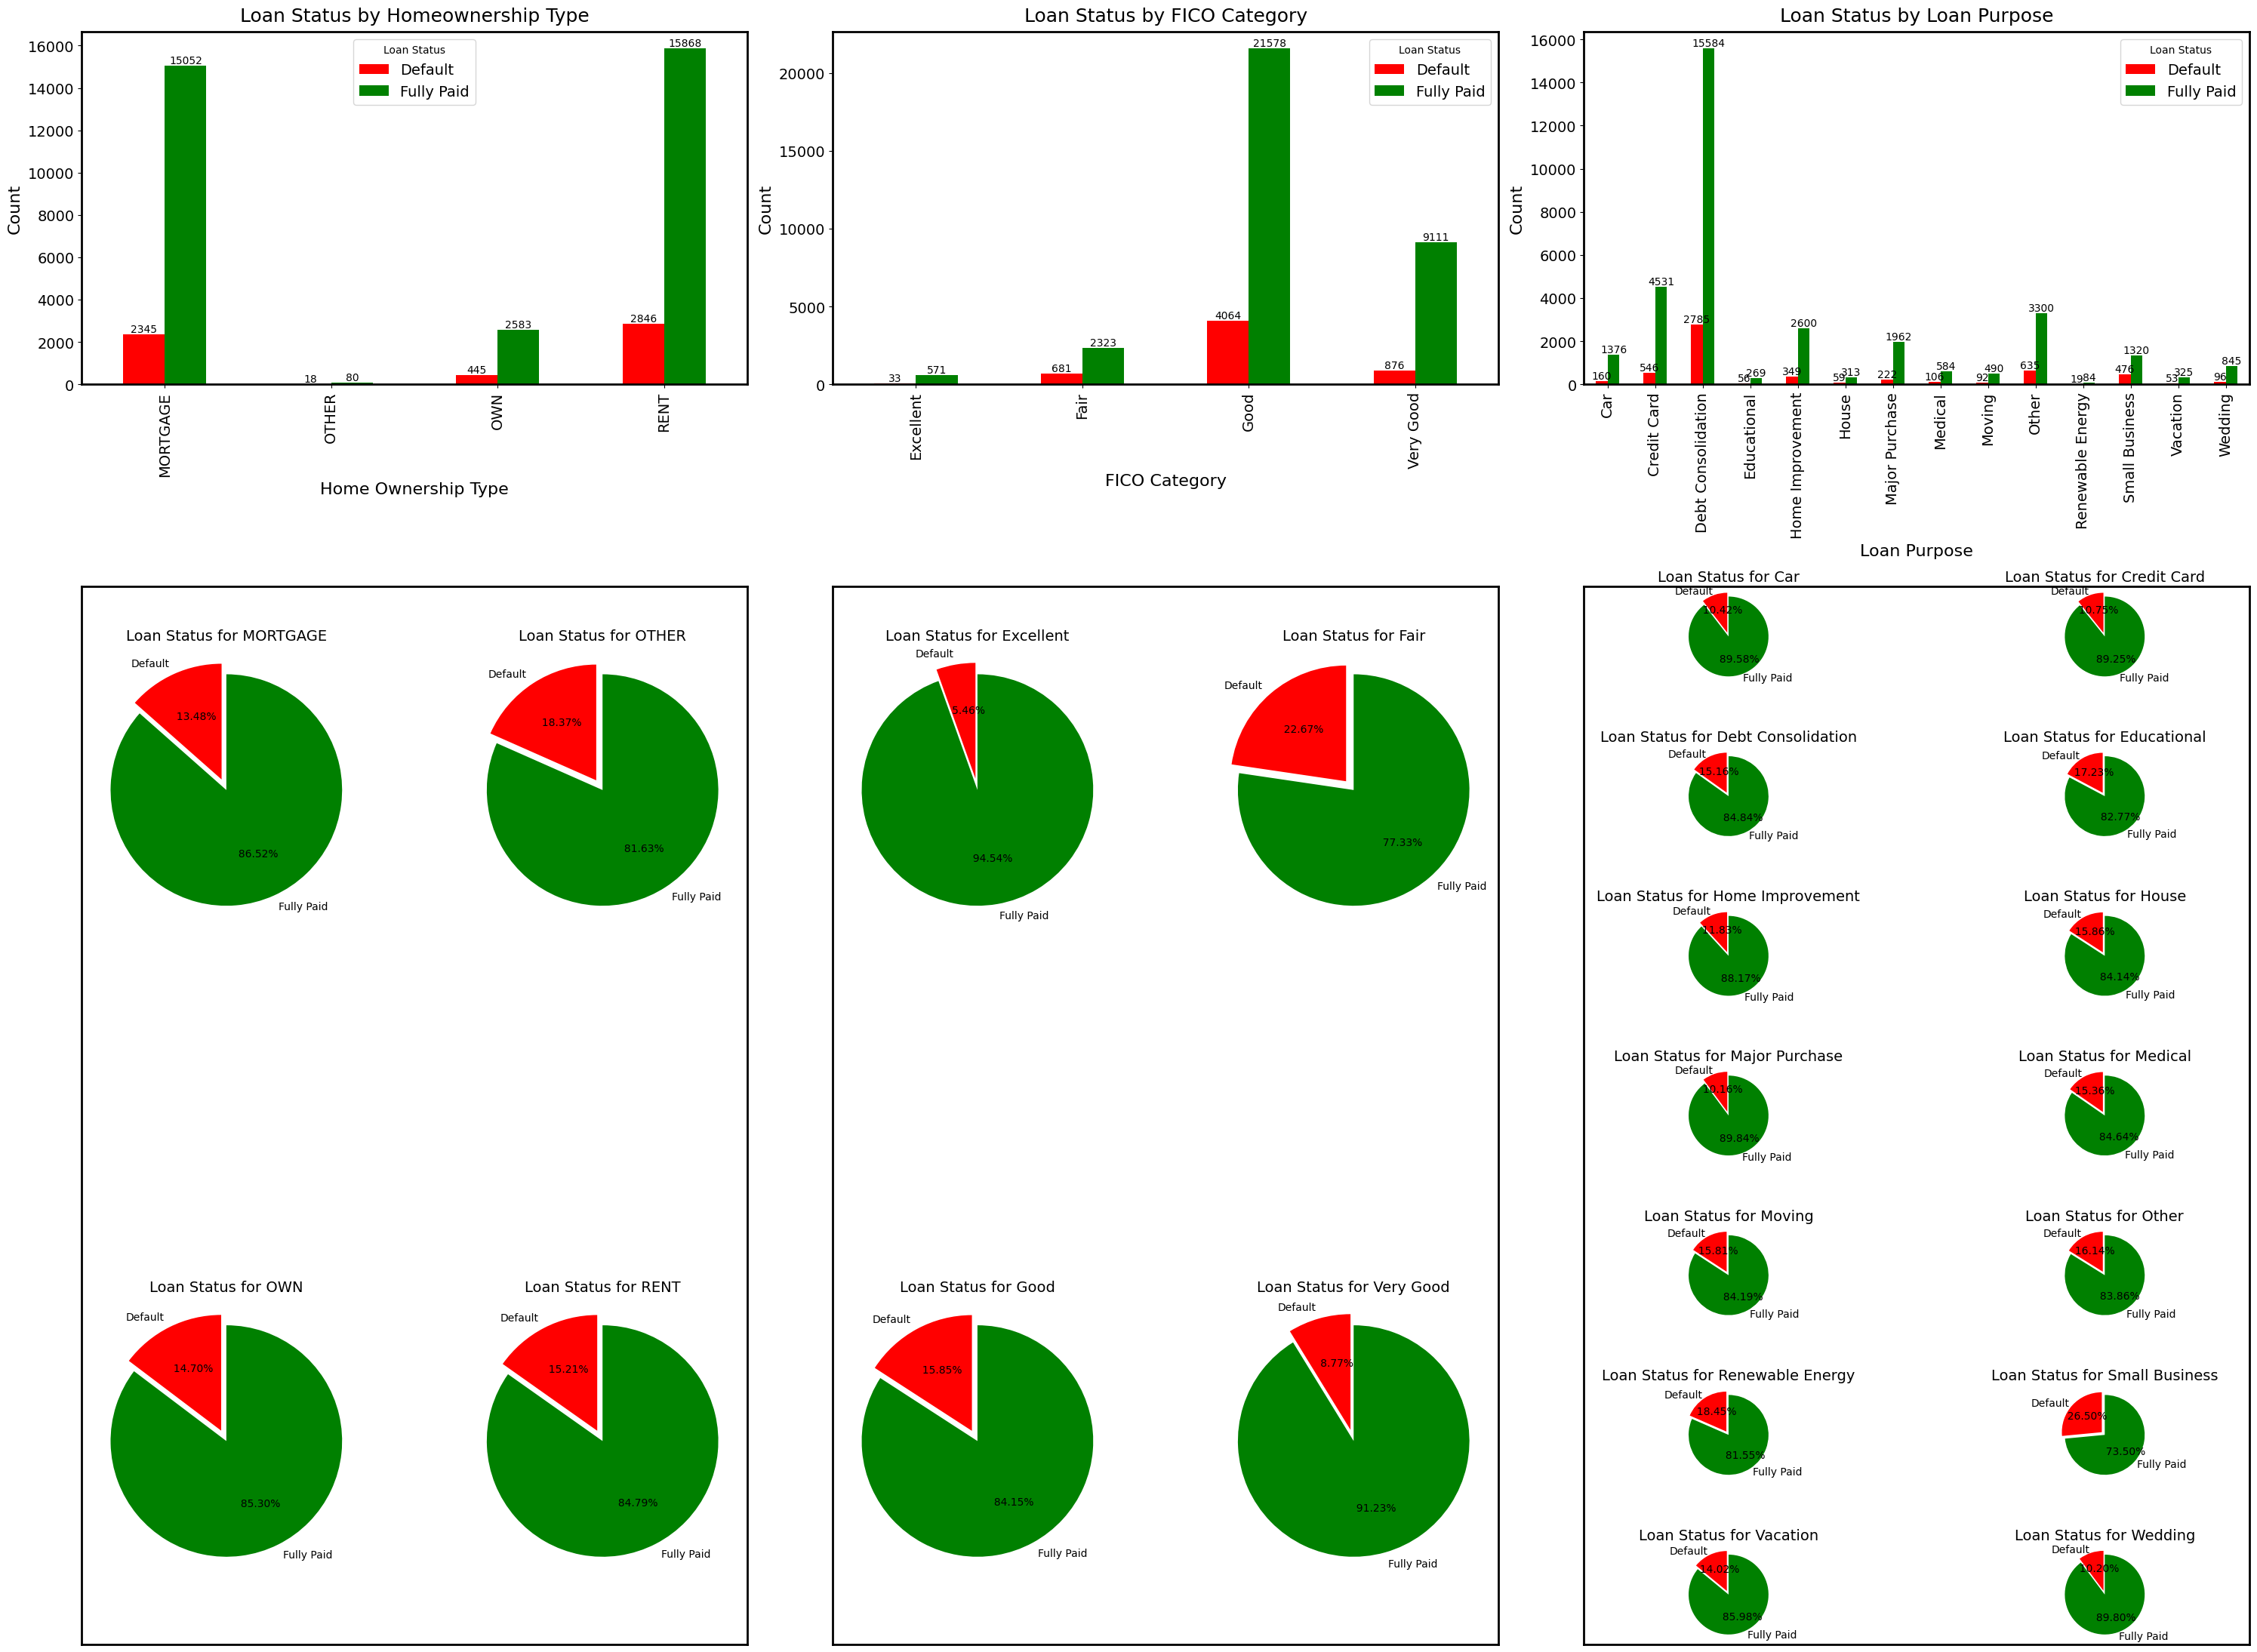

In [5]:
import matplotlib.pyplot as plt

homeownership_counts = df.groupby(["home_ownership", "loan_status"]).size().unstack()
fico_counts = df.groupby(["fico_category", "loan_status"]).size().unstack()
purpose_counts = df.groupby(["purpose", "loan_status"]).size().unstack()

colors = ["red", "green"]
fig = plt.figure(figsize=(30, 22))
grid_spec = fig.add_gridspec(nrows=2, ncols=3, height_ratios=[1, 3])

ax1 = fig.add_subplot(grid_spec[0, 0])
homeownership_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Loan Status by Homeownership Type', fontsize=18, pad=10)
ax1.set_xlabel('Home Ownership Type', fontsize=16, labelpad=5)
ax1.set_ylabel('Count', fontsize=16, labelpad=5)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(title='Loan Status', fontsize=14)
ax1.spines[:].set_visible(True)
ax1.spines[:].set_linewidth(2)
for p in ax1.patches:
    ax1.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

ax2 = fig.add_subplot(grid_spec[0, 1])
fico_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Loan Status by FICO Category', fontsize=18, pad=10)
ax2.set_xlabel('FICO Category', fontsize=16, labelpad=5)
ax2.set_ylabel('Count', fontsize=16, labelpad=5)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(title='Loan Status', fontsize=14)
ax2.spines[:].set_visible(True)
ax2.spines[:].set_linewidth(2)
for p in ax2.patches:
    ax2.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )


ax3 = fig.add_subplot(grid_spec[0, 2])
purpose_counts.plot(kind='bar', ax=ax3, color=colors)
ax3.set_title('Loan Status by Loan Purpose', fontsize=18, pad=10)
ax3.set_xlabel('Loan Purpose', fontsize=16, labelpad=5)
ax3.set_ylabel('Count', fontsize=16, labelpad=5)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.legend(title='Loan Status', fontsize=14)
ax3.spines[:].set_visible(True)
ax3.spines[:].set_linewidth(2)
for p in ax3.patches:
    ax3.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

def create_pie_grid(counts, title, grid_spec, row, col, num_cols=2):
    num_pies = counts.shape[0]
    num_rows = (num_pies + num_cols - 1) // num_cols
    inner_grid = grid_spec[row, col].subgridspec(num_rows, num_cols, wspace=0.3, hspace=0.6)
    container_ax = fig.add_subplot(grid_spec[row, col])
    container_ax.set_frame_on(True)
    container_ax.spines[:].set_visible(True)
    container_ax.spines[:].set_linewidth(2)
    container_ax.set_xticks([])
    container_ax.set_yticks([])
    for i, (category, values) in enumerate(counts.iterrows()):
        ax = fig.add_subplot(inner_grid[i // num_cols, i % num_cols])
        ax.pie(values, labels=values.index, autopct='%7.2f%%', colors=colors, startangle=90,explode=[0.1,0])
        
        ax.set_title(f'{title} for {category}', fontsize=14, pad=5)

create_pie_grid(homeownership_counts, 'Loan Status', grid_spec, 1, 0)
create_pie_grid(fico_counts, 'Loan Status', grid_spec, 1, 1)
create_pie_grid(purpose_counts, 'Loan Status', grid_spec, 1, 2)

plt.tight_layout()
plt.show()



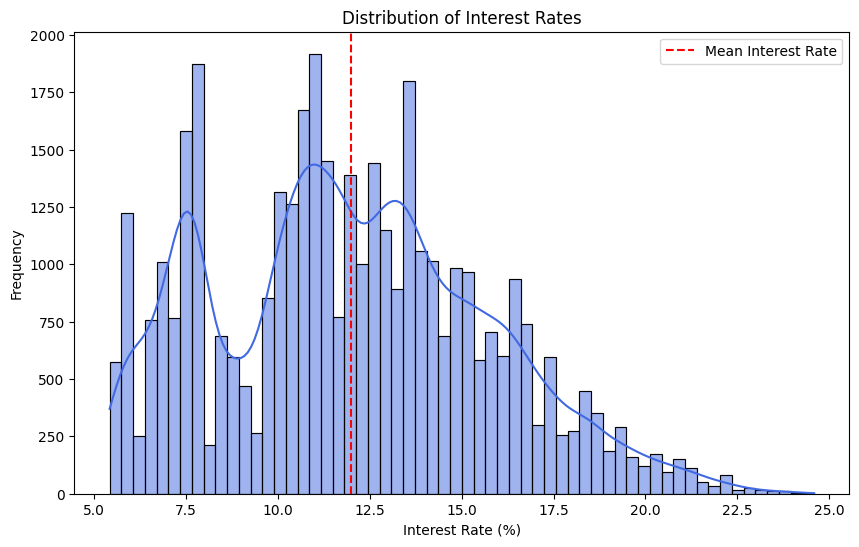

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'], kde=True, bins=60, color="royalblue", edgecolor="black")
plt.axvline(df['int_rate'].mean(), color='red', linestyle='dashed', label='Mean Interest Rate')
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Interest Rates")
plt.legend()
plt.show()


In [7]:
# Summary statistics
num_cols = ["loan_amnt", "installment", "emp_length", "int_rate", "annual_inc", 
            "dti", "fico_range_high", "funded_amnt", "monthly_inc", "installment_to_income_ratio_%"]
summary = df[num_cols].describe()
print(summary)

          loan_amnt   installment    emp_length      int_rate    annual_inc  \
count  39237.000000  39237.000000  39237.000000  39237.000000  3.923700e+04   
mean   11135.277289    323.286491      4.949588     11.981596  6.888345e+04   
std     7398.257782    208.463470      3.567020      3.708032  6.400080e+04   
min      500.000000     15.690000      0.000000      5.420000  4.000000e+03   
25%     5400.000000    166.310000      2.000000      8.940000  4.002000e+04   
50%    10000.000000    279.070000      4.000000     11.830000  5.900000e+04   
75%    15000.000000    427.330000      9.000000     14.460000  8.200000e+04   
max    35000.000000   1305.190000     10.000000     24.590000  6.000000e+06   

                dti  fico_range_high   funded_amnt    monthly_inc  \
count  39237.000000     39237.000000  39237.000000   39237.000000   
mean      13.294011       718.997324  10863.750414    5740.287173   
std        6.676667        35.867106   7126.034598    5333.399811   
min        0

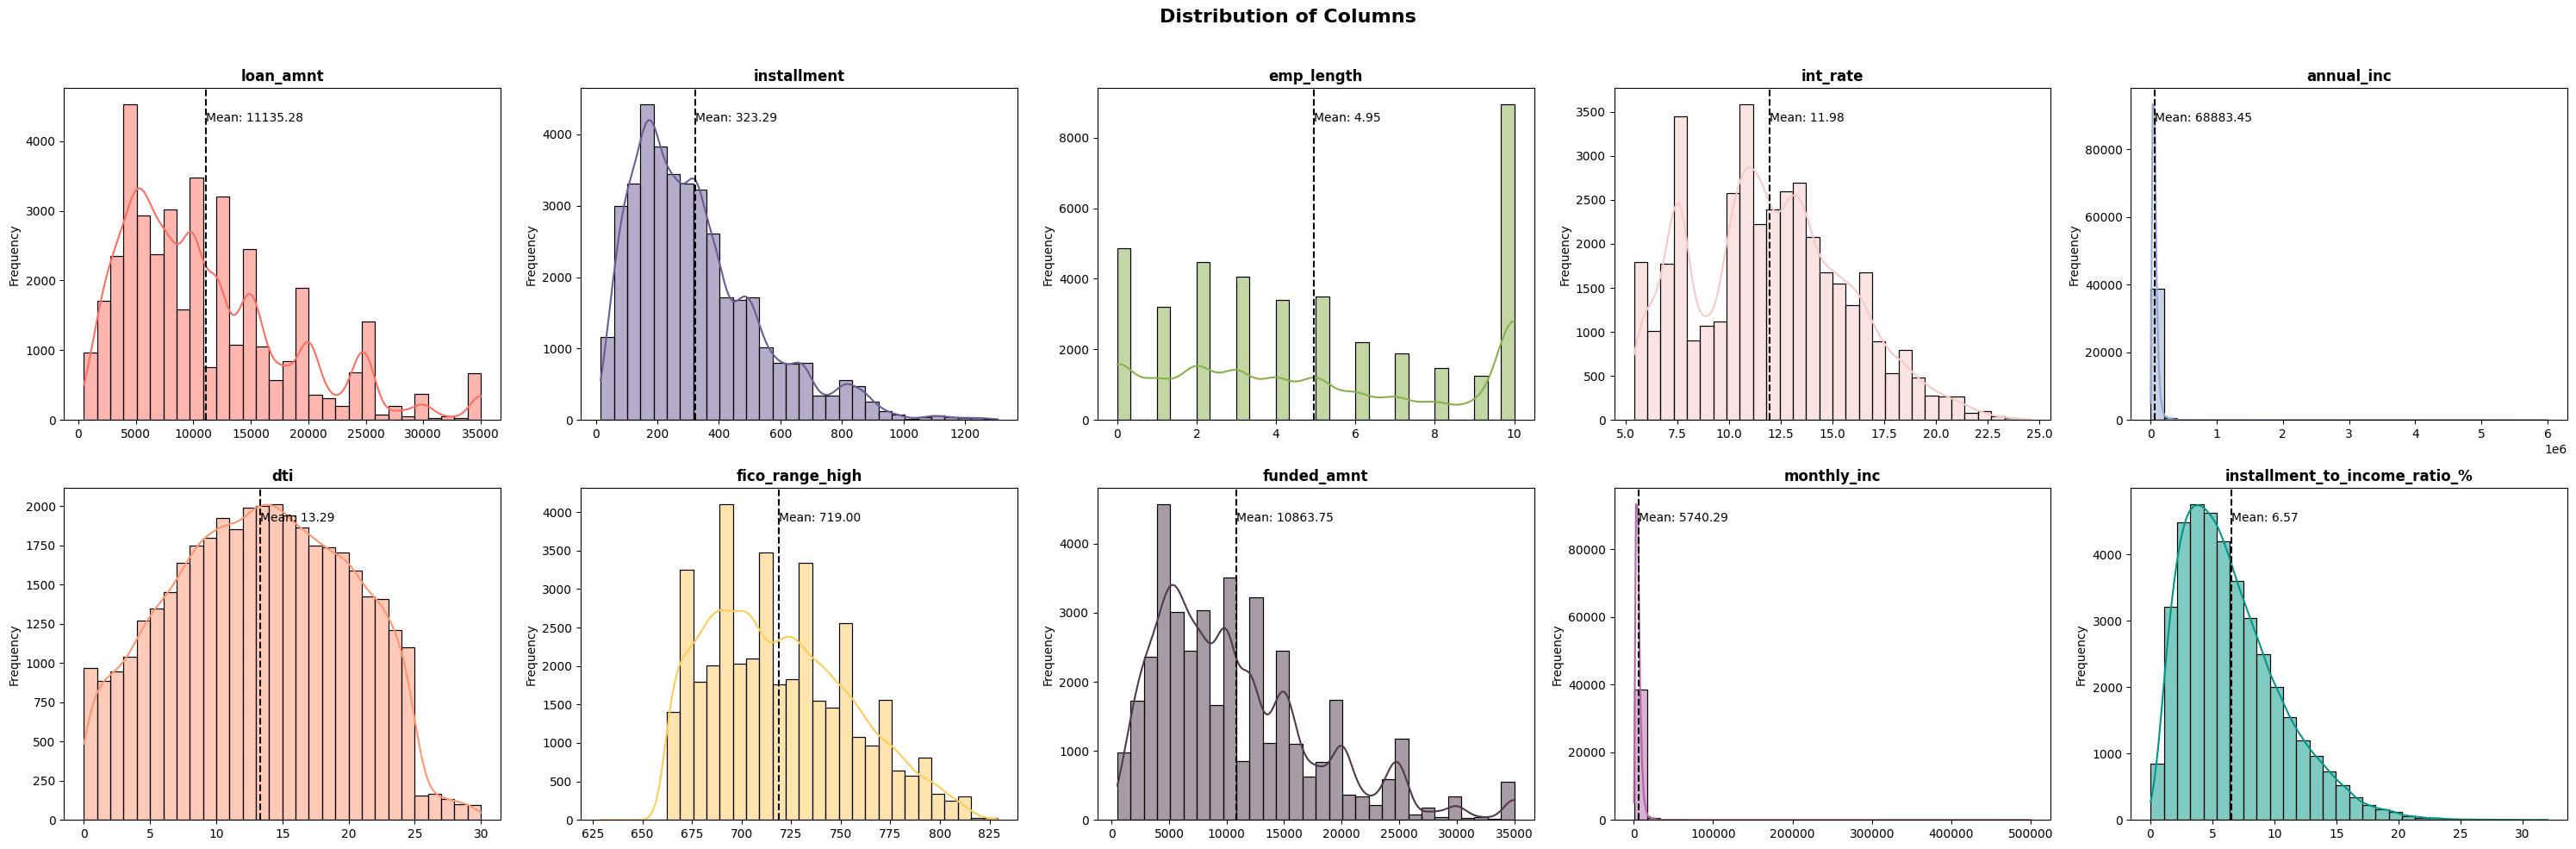

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define number of rows and columns for the grid
rows, cols = 2, 5  
num_features = len(num_cols)

# Set figure size
fig, axes = plt.subplots(rows, cols, figsize=(30, 10))  
fig.suptitle("Distribution of Columns", fontsize=16, fontweight="bold")

# Define colors
colors = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1", 
          "#ff9671", "#ffcc5c", "#50394c", "#b565a7", "#009688"]

# Loop through each numerical column and plot
for i, col in enumerate(num_cols):
    row, col_idx = divmod(i, cols)  # Get row and column index
    
    # Plot histogram
    sns.histplot(df[col], kde=True, bins=30, color=colors[i], ax=axes[row, col_idx])

    # Add mean line
    mean_val = df[col].mean()
    axes[row, col_idx].axvline(mean_val, color="black", linestyle="dashed", linewidth=1.5)
    axes[row, col_idx].text(mean_val, axes[row, col_idx].get_ylim()[1] * 0.9, 
                            f"Mean: {mean_val:.2f}", color="black", fontsize=10)

    # Titles and labels
    axes[row, col_idx].set_title(f"{col}", fontsize=12, fontweight="bold")
    axes[row, col_idx].set_xlabel("")
    axes[row, col_idx].set_ylabel("Frequency")

# Remove empty subplots if num_cols < 10
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


C:\Users\patel\AppData\Local\Temp\ipykernel_13500\3135627730.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette=[colors[i]], ax=ax)
C:\Users\patel\AppData\Local\Temp\ipykernel_13500\3135627730.py:15: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[col], order=df[col].value_counts().index, palette=[colors[i]], ax=ax)
C:\Users\patel\AppData\Local\Temp\ipykernel_13500\3135627730.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
C:\Users\patel\AppData\Local\Temp\ipykernel_13500\3135627730.py:15: FutureWarning: 

Passing `palette` witho

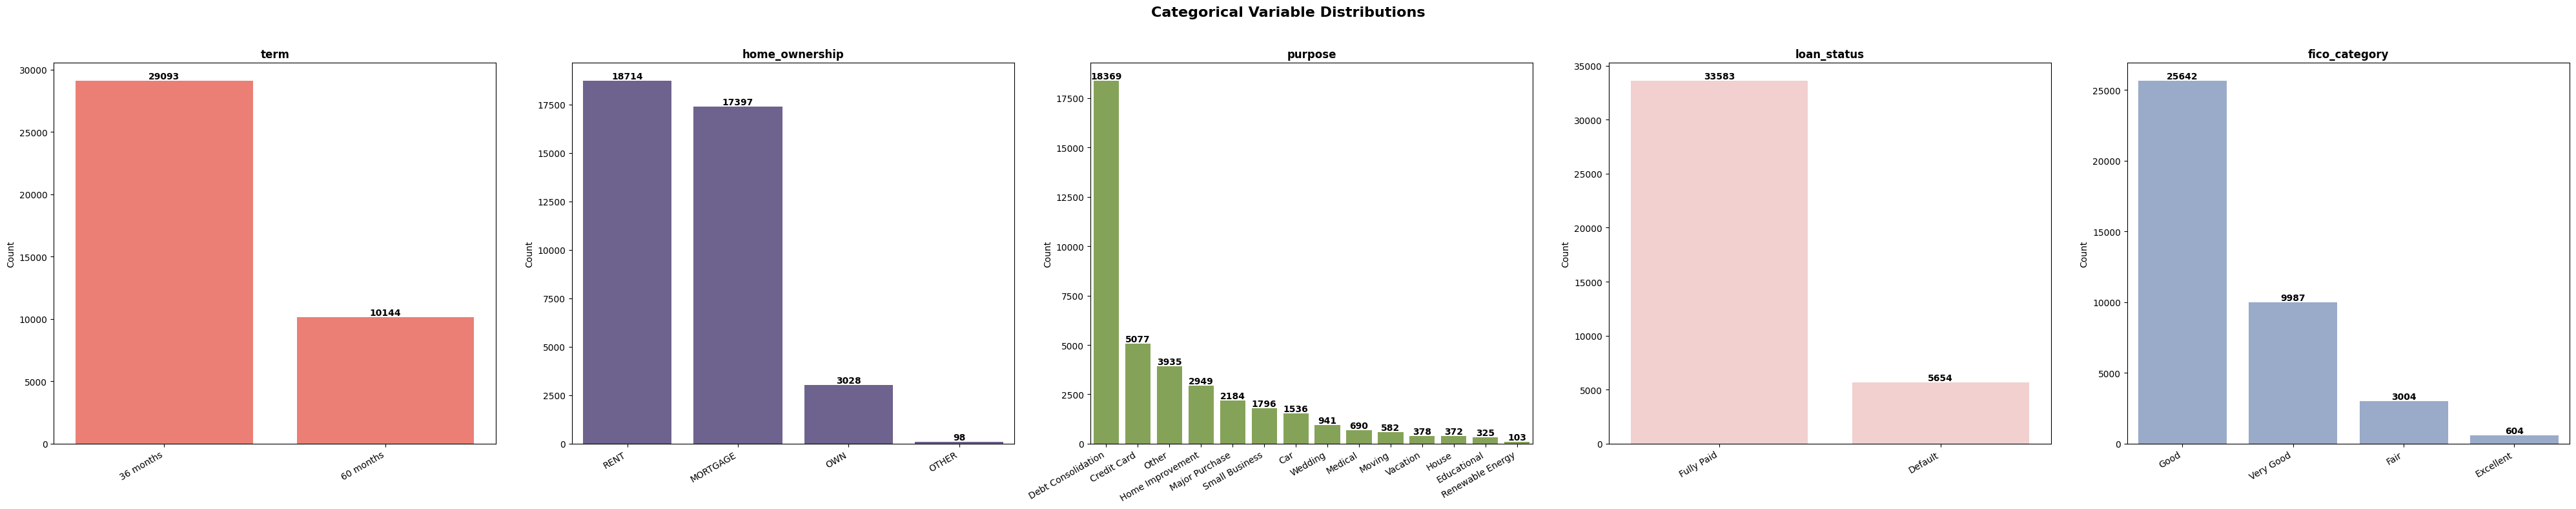

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define layout
rows, cols = 1, 5
fig, axes = plt.subplots(rows, cols, figsize=(40, 8))
fig.suptitle("Categorical Variable Distributions", fontsize=16, fontweight="bold")

# Define color palette
colors = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]
cat_cols = ["term", "home_ownership", "purpose", "loan_status", "fico_category"]
# Loop through each categorical column and plot
for i, col in enumerate(cat_cols):
    ax = axes[i]  # Get corresponding axis
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette=[colors[i]], ax=ax)

    # Add count labels on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    # Titles and labels
    ax.set_title(f"{col}", fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")

    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


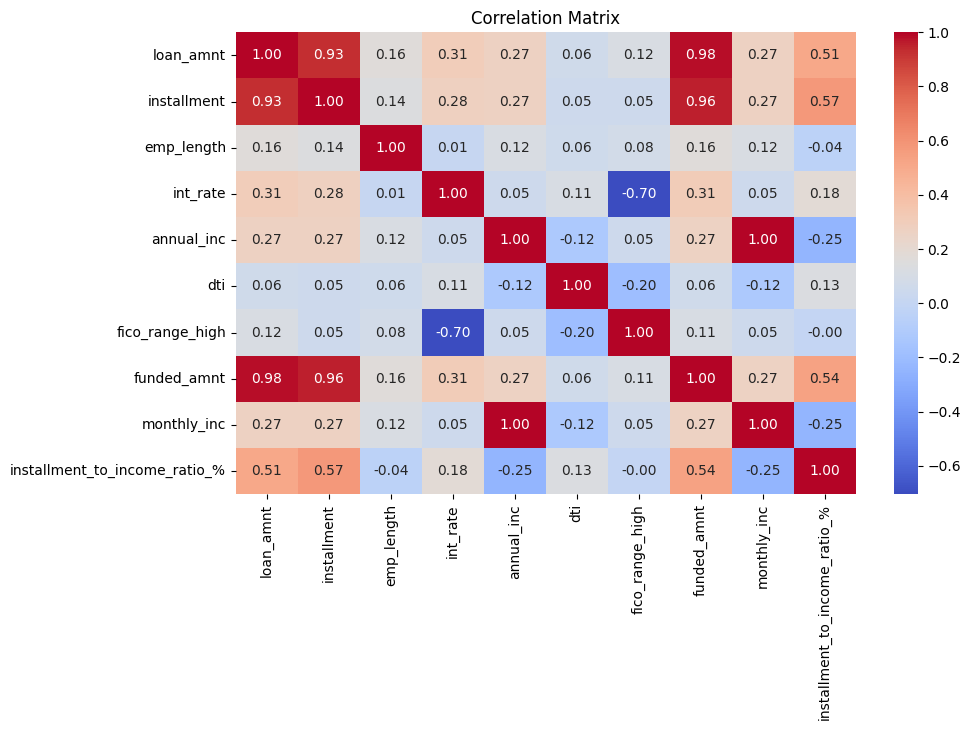

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


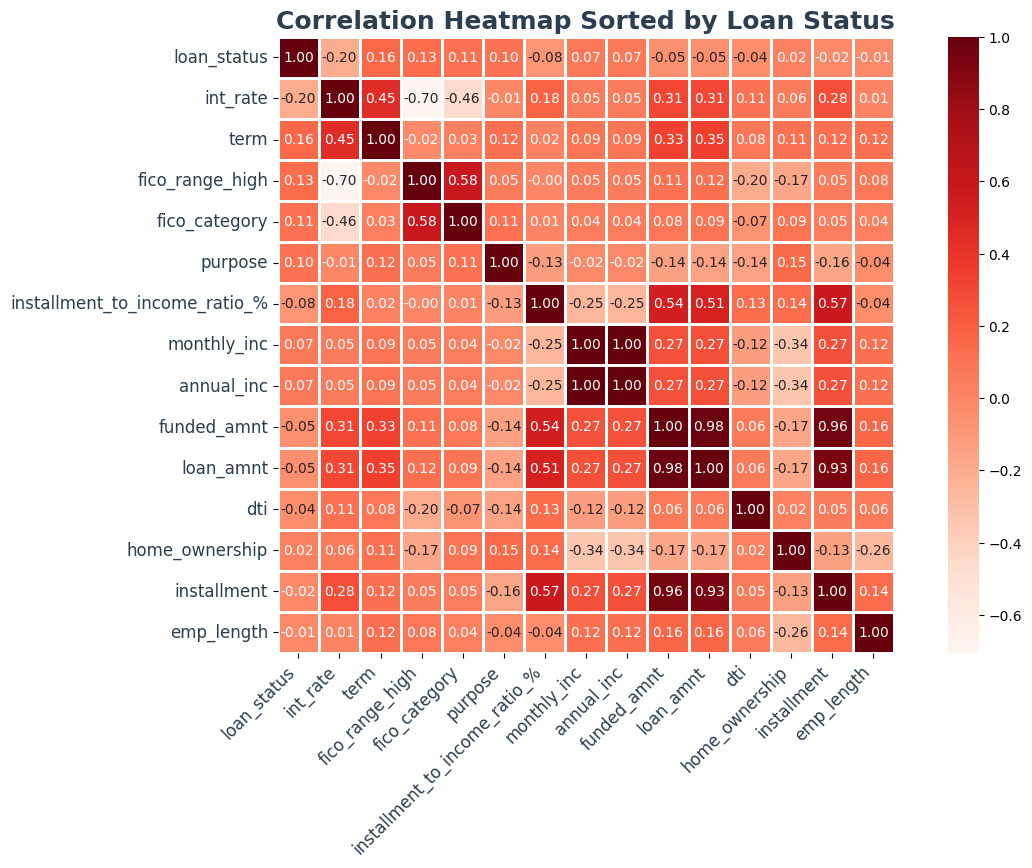

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Combine numerical & categorical columns
all_columns = num_cols + cat_cols
corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

# Compute correlations
for col1 in all_columns:
    for col2 in all_columns:
        if col1 in num_cols and col2 in num_cols:  # Pearson for numerical
            corr_matrix.loc[col1, col2] = df[col1].corr(df[col2])
        elif col1 in cat_cols and col2 in cat_cols:  # Cramér’s V for categorical
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:  # Rank-based correlation for mixed types
            corr_matrix.loc[col1, col2] = df[col1].astype('category').cat.codes.corr(df[col2].astype('category').cat.codes)

# Convert to float
corr_matrix = corr_matrix.astype(float)

# Sort matrix by correlation with "loan_status"
corr_matrix = corr_matrix.loc[corr_matrix["loan_status"].abs().sort_values(ascending=False).index, 
                              corr_matrix["loan_status"].abs().sort_values(ascending=False).index]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Reds", linewidths=1, linecolor="white", 
            cbar=True, square=True, annot_kws={"size": 10})

# Title
plt.title("Correlation Heatmap Sorted by Loan Status", fontsize=18, fontweight="bold", color="#2c3e50")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12, color="#2c3e50")
plt.yticks(fontsize=12, color="#2c3e50")

# Show plot
plt.show()


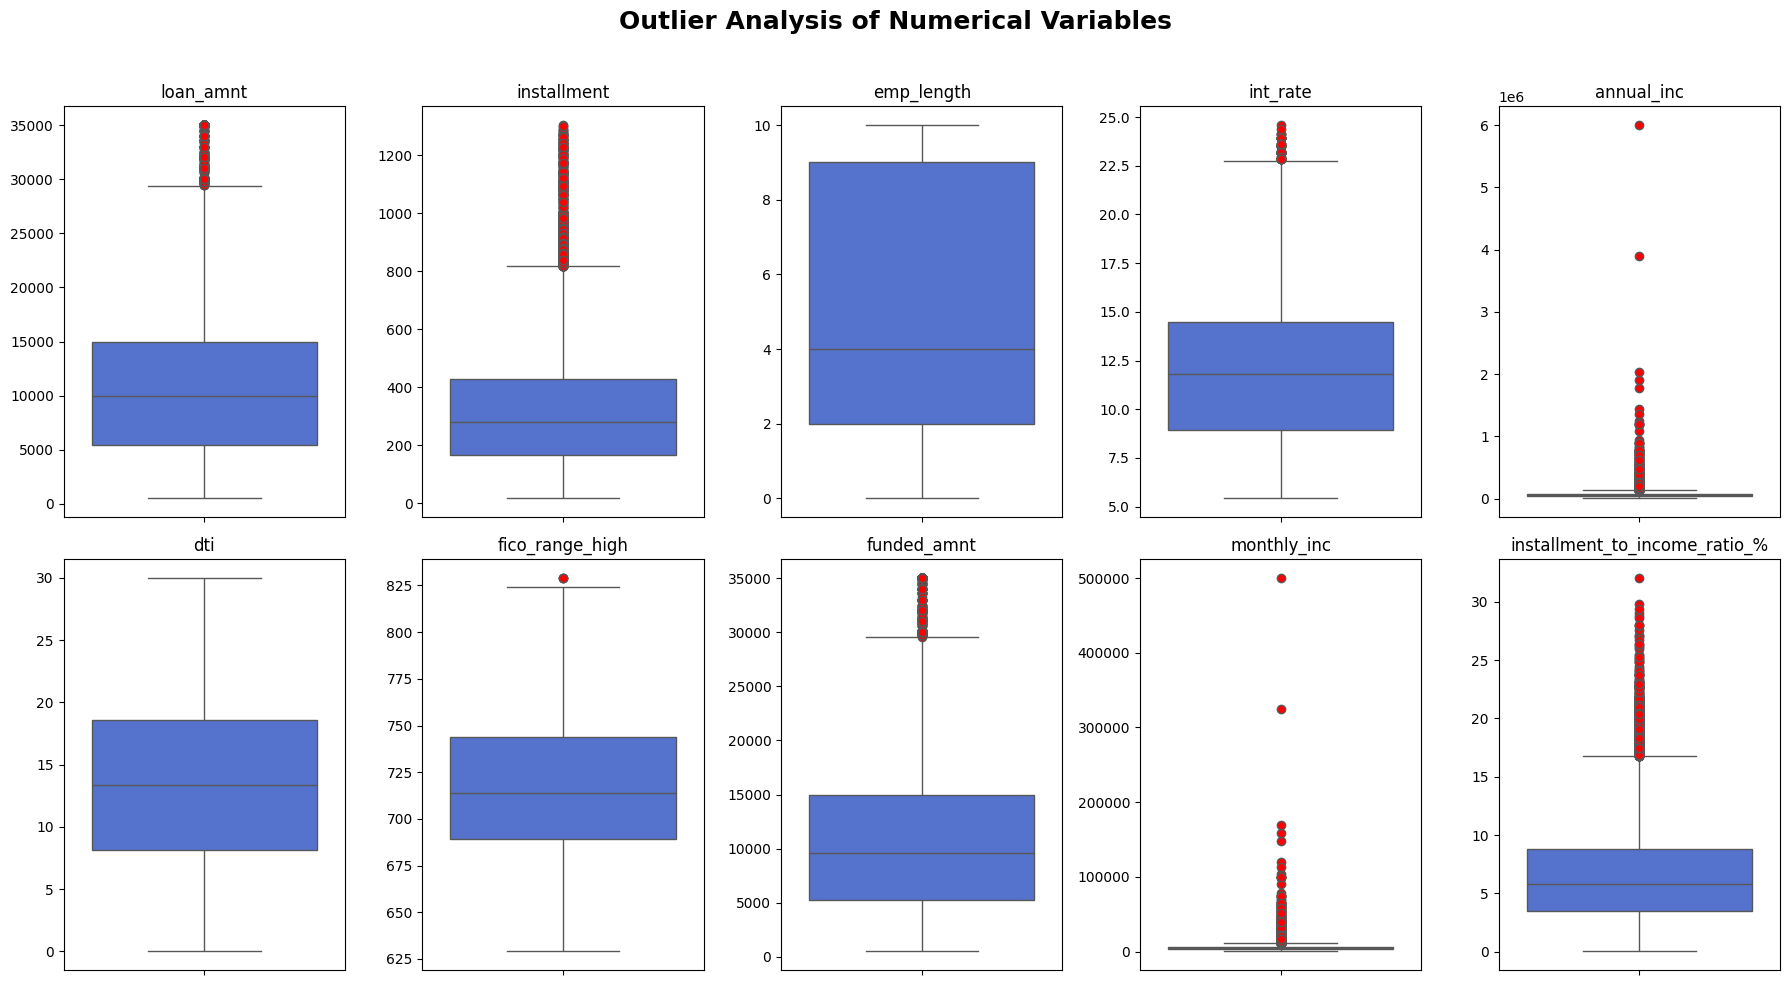

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for 2x5 grid layout
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
fig.suptitle("Outlier Analysis of Numerical Variables", fontsize=18, fontweight="bold")

# Loop through numerical columns and plot boxplots
for i, col in enumerate(num_cols):
    row, col_index = divmod(i, 5)  # Arrange in 2x5 grid
    sns.boxplot(y=df[col], ax=axes[row, col_index], color="royalblue", flierprops={"marker": "o", "markerfacecolor": "red"})
    axes[row, col_index].set_title(f"{col}", fontsize=12)
    axes[row, col_index].set_ylabel("")
    
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
plt.show()


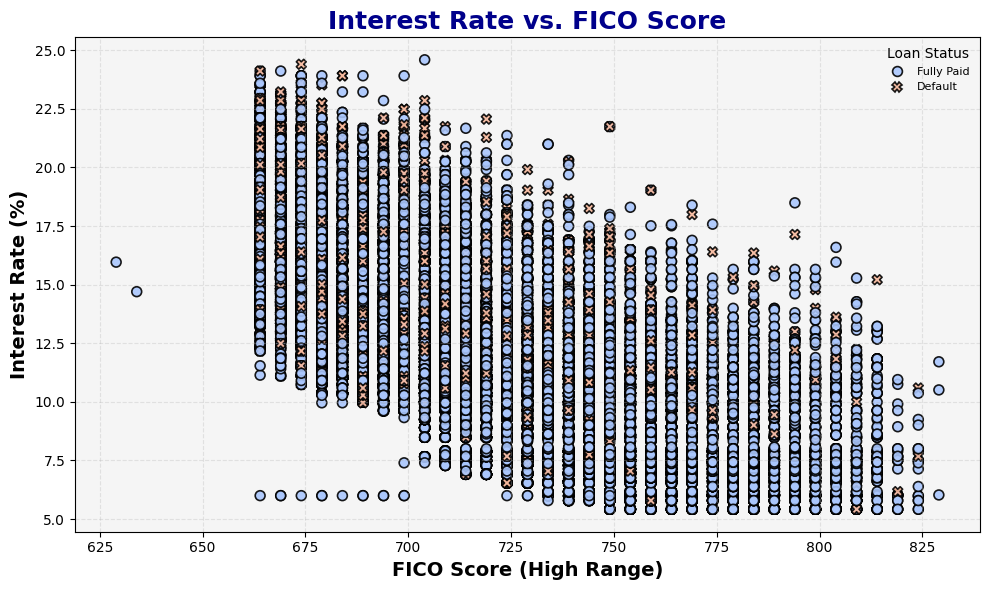

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Define markers for each loan status
markers = {"Fully Paid": "o", "Default": "X"}

# Create the scatter plot with styling
sns.scatterplot(
    data=df, 
    x="fico_range_high", 
    y="int_rate", 
    hue="loan_status", 
    style="loan_status", 
    palette="coolwarm", 
    markers=markers, 
    alpha=0.9,
    s=50,  # Increase marker size
    edgecolor='black',  # Add black edges to markers
    linewidth=1.2  # Enhance marker edges for better visibility
)

# Title and labels
plt.title("Interest Rate vs. FICO Score", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("FICO Score (High Range)", fontsize=14, fontweight="bold")
plt.ylabel("Interest Rate (%)", fontsize=14, fontweight="bold")

# Enhance grid and background
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor('whitesmoke')  # Light background color for the plot area

# Customize legend
plt.legend(title='Loan Status', title_fontsize='10', loc='upper right', fontsize=8, frameon=False)

# Show plot
plt.tight_layout()  # Ensure labels and title fit nicely
plt.show()
